In [2]:
from sentence_transformers import SentenceTransformer, util
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np

from attacut import tokenize, Tokenizer

import umap
import umap.plot
from sklearn.datasets import load_digits

### Define Tokenizer Function

In [3]:
def tokenizer_text(sentence):
    words = tokenize(sentence)
    space_sentence = " ".join(words)
    return space_sentence
    
# tokenizer_text("การทำเครื่องประดับจากเพชรพลอย และหินมีค่าทุกชนิด และทำแว่นสายตา  Is this the first document? แมว")

### Preprocess

In [4]:
df = pd.read_excel('dataset314.xlsx')

In [5]:
df

,เลขทะเบียนนิติบุคคล,THname,TSIC Code,ประกอบธุรกิจ,product_type
0,105548144838,แอนติก้า,32111,การผลิตเครื่องประดับจากอัญมณีและโลหะมีค่า,Gold Jewelry.Diamonds Jewelry
1,105548144838,แอนติคก้า เจมส์,32111,ประกอบธุจกิจหลักจำหน่ายและให้บริการออกแบบผลิตเ...,Gemstones
2,105540000799,แอนทิค เจมส์,32111,การผลิตเครื่องประดับจากอัญมณีและโลหะมีค่า,Gold Jewelry
3,123562001991,168 หนูบางแค,32112,ผลิตและจำหน่ายเหรียญโลหะทุกประเภท,"Gemstones,Simi-Precious"
4,105548068538,กรหิรัญ,32112,ประกอบกิจการเกี่ยวกับผลิตและจำหน่ายเครื่องเงิน...,"Gold Bars / Bullion,Rough Diamonds,Precious St..."


In [6]:
df['x_roberta'] = df['ประกอบธุรกิจ'] + ' ' + df['product_type']
df['x_tfidf'] = df['x_roberta'].apply(tokenizer_text)
df['target'] = df['TSIC Code'].astype('category').cat.codes

In [7]:
df

,เลขทะเบียนนิติบุคคล,THname,TSIC Code,ประกอบธุรกิจ,product_type,x_roberta,x_tfidf,target
0,105548144838,แอนติก้า,32111,การผลิตเครื่องประดับจากอัญมณีและโลหะมีค่า,Gold Jewelry.Diamonds Jewelry,การผลิตเครื่องประดับจากอัญมณีและโลหะมีค่า Gold...,การ ผลิต เครื่อง ประดับ จาก อัญมณี และ โลหะ มี...,0
1,105548144838,แอนติคก้า เจมส์,32111,ประกอบธุจกิจหลักจำหน่ายและให้บริการออกแบบผลิตเ...,Gemstones,ประกอบธุจกิจหลักจำหน่ายและให้บริการออกแบบผลิตเ...,ประกอบ ธุจกิจ หลัก จำหน่าย และ ให้ บริการ ออก ...,0
2,105540000799,แอนทิค เจมส์,32111,การผลิตเครื่องประดับจากอัญมณีและโลหะมีค่า,Gold Jewelry,การผลิตเครื่องประดับจากอัญมณีและโลหะมีค่า Gold...,การ ผลิต เครื่อง ประดับ จาก อัญมณี และ โลหะ มี...,0
3,123562001991,168 หนูบางแค,32112,ผลิตและจำหน่ายเหรียญโลหะทุกประเภท,"Gemstones,Simi-Precious","ผลิตและจำหน่ายเหรียญโลหะทุกประเภท Gemstones,Si...",ผลิต และ จำหน่าย เหรียญ โลหะ ทุก ประเภท Gems...,1
4,105548068538,กรหิรัญ,32112,ประกอบกิจการเกี่ยวกับผลิตและจำหน่ายเครื่องเงิน...,"Gold Bars / Bullion,Rough Diamonds,Precious St...",ประกอบกิจการเกี่ยวกับผลิตและจำหน่ายเครื่องเงิน...,ประกอบ กิจการ เกี่ยว กับ ผลิต และ จำหน่าย เครื...,1


In [8]:
y = df['target'].values

### Embedding with TFIDF

In [9]:
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(df['x_tfidf'].values)

In [11]:
X_tfidf.toarray()

array([[0.        , 0.        , 0.29579721, 0.        , 0.2455384 ,
        0.59159442, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.2455384 , 0.        , 0.        ,
        0.29579721, 0.        , 0.29579721, 0.        , 0.        ,
        0.        , 0.        , 0.2455384 , 0.        , 0.1747026 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.20655465, 0.        , 0.        , 0.        , 0.20655465,
        0.        , 0.        , 0.        , 0.1747026 , 0.2455384 ,
        0.        ],
       [0.        , 0.        , 0.        , 0.25280532, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.20985126, 0.31334568, 0.        ,
        0.        , 0.20985126, 0.        , 0.        , 0.        ,
        0.31334568, 0.25280532, 0.20985126, 0.        , 0.1493109 ,
        0.        , 0.        , 0.        , 0.        , 0.31334568,
        0.17653349, 0.31334

#### umap & plot 

/home/patcharapon/miniconda3/envs/sbert/lib/python3.8/site-packages/umap/umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


<AxesSubplot: >

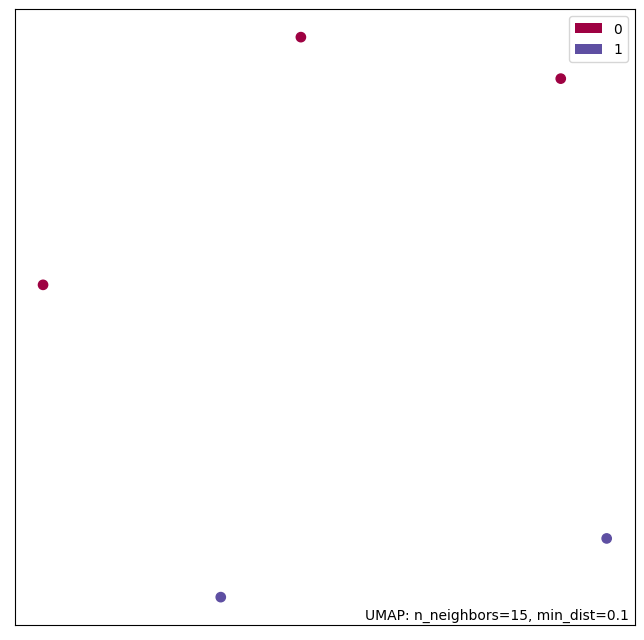

In [9]:
mapper = umap.UMAP().fit(X_tfidf)
umap.plot.points(mapper, labels=y)

#### Plot interactive

In [10]:
p = umap.plot.interactive(mapper, labels=y, hover_data=df, point_size=10)
umap.plot.show(p)

### Embedding with xlm-roberta-base 

In [11]:
model = SentenceTransformer('xlm-roberta-base')

2022-11-25:12:38:14 WARNING  [sentence_transformers.SentenceTransformer:805] No sentence-transformers model found with name /home/patcharapon/.cache/torch/sentence_transformers/xlm-roberta-base. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at /home/patcharapon/.cache/torch/sentence_transformers/xlm-roberta-base were not used when initializing XLMRobertaModel: ['lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing XLMRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model)

In [12]:
X_roberta = model.encode(df['x_roberta'].values)

In [13]:
X_roberta

array([[-0.00084542,  0.04235534,  0.00395387, ...,  0.03699317,
         0.01012877,  0.04980231],
       [-0.00351525, -0.00286574,  0.02613013, ...,  0.0288909 ,
         0.05011866,  0.04277145],
       [ 0.01481369,  0.02861632,  0.01146653, ...,  0.03824672,
         0.03512038,  0.08857794],
       [ 0.00288553,  0.00833486,  0.02988876, ..., -0.00894195,
         0.06090482,  0.12990814],
       [-0.01155416,  0.01691992,  0.02969252, ...,  0.02766423,
         0.05441945,  0.07499632]], dtype=float32)

#### umap & plot 

/home/patcharapon/miniconda3/envs/sbert/lib/python3.8/site-packages/umap/umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


<AxesSubplot: >

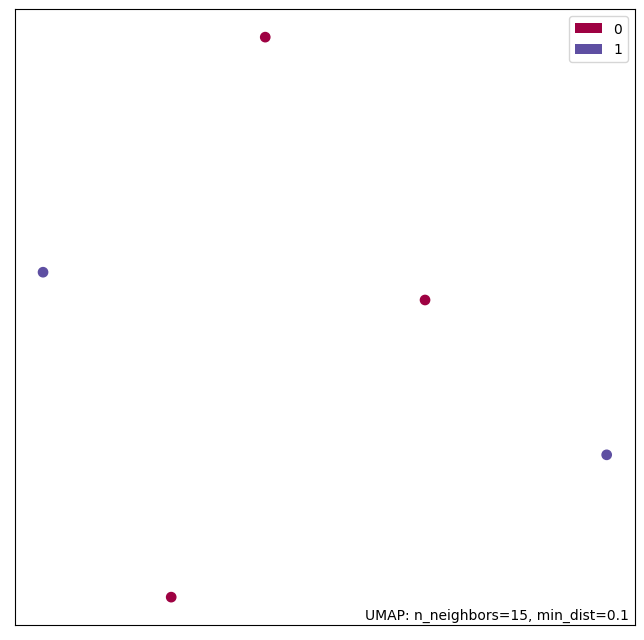

In [14]:
mapper = umap.UMAP().fit(X_roberta)
umap.plot.points(mapper, labels=y)

#### Plot interactive

In [15]:
p = umap.plot.interactive(mapper, labels=y, hover_data=df, point_size=10)
umap.plot.show(p)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
